# Project 3: More Classification

#### Submitted by: Prateek Kumar

## Part 1: Acquire and Partition Data

In [1]:
import numpy as np                                          # import numpy
import matplotlib.pyplot as plt                             # import matplotlib.pyplot for plotting framework
from sklearn.model_selection import train_test_split        # partitioning the data
from sklearn.preprocessing import StandardScaler            # standardizing the data

### 1.1 Getting the Data via Python 

In [2]:
data = np.loadtxt ("sonar5841.dat")
X = data[:,0:-1]
Y = data[:,-1] 

In [3]:
print("Shape of X:", X.shape)                               # should be 208 by 60
print("Shape of Y:", Y.shape)                               # should be 208 long

Shape of X: (208, 60)
Shape of Y: (208,)


### 1.2 Partitioning the Data

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
print("Shape of training sample:",X_train.shape)            # 166 rows for training set
print("Shape of testing sample:",X_test.shape)              # 42 rows for testing set

Shape of training sample: (166, 60)
Shape of testing sample: (42, 60)


### 1.3 Part 1 Deliverables 

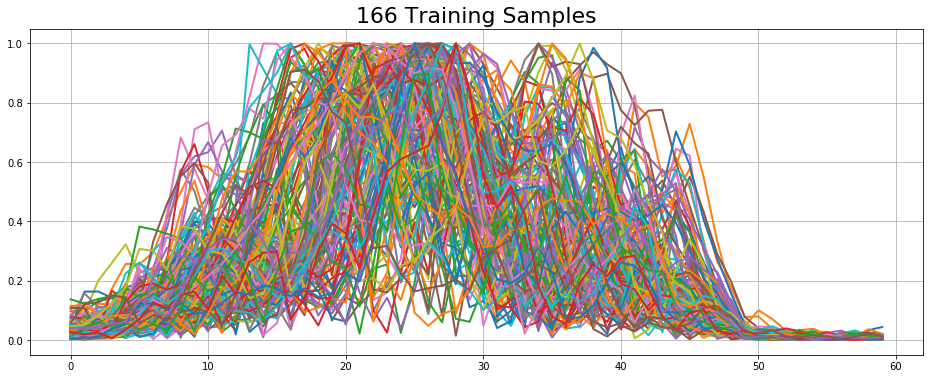

In [6]:
plt.figure(figsize=(16,6)) 
plt.grid()
for i in range(0,len(X_train)): 
    plt.plot(X_train[i], linewidth=2)
    plt.title('166 Training Samples', fontsize=22)

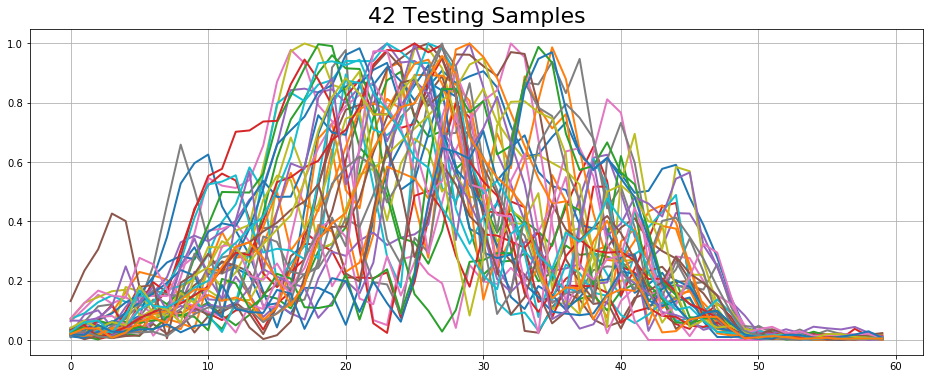

In [7]:
plt.figure(figsize=(16,6)) 
plt.grid()
for i in range(0,len(X_test)): 
    plt.plot(X_test[i], linewidth=2)
    plt.title('42 Testing Samples', fontsize=22)

### 1.4 Standardizing all the data based on the statistics of the training set

In [8]:
X_train = StandardScaler().fit_transform(X_train) 
X_test = StandardScaler().fit_transform(X_test)

## Part 2: Apply Classifiers

### 2.1 Logistic Regression 

In [9]:
from sklearn.linear_model import LogisticRegression            # Built-in function to implement LR
from sklearn.metrics import accuracy_score                     # Built-in function to calculate accuracy score

In [10]:
model = LogisticRegression()                                   # applying LR
model.fit(X_train, Y_train)

C:\winapps\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
lr_acc = round(model.score(X_test, Y_test),4)*100              # LR accuracy
print("Accuracy:",lr_acc,"%")

Accuracy: 80.95 %


### 2.2 Linear SVMs

In [12]:
from sklearn.svm import SVC                # Built-in function to implement SVM
from random import randrange

### Function for cross-validation 

In [13]:
def cross_validation_split(dataset, folds=5):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))      # here I am using random function so our each fold will have different values each time the function is called
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [14]:
X_fold = cross_validation_split(X_train, 5)            # calling the cross validation function
Y_fold = cross_validation_split(Y_train, 5)

### Implementing Linear SVM 

In [15]:
acc_sc = 0                                                   # variable to store accuracy score
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]              # list of different C values to find the C value with max accuracy
acc_lis = np.zeros(len(C))

for i in range(4,-1,-1):                                     
    X_train_1,Y_train_1,X_test_1,Y_test_1 = [],[],[],[]
    X_test_1 = X_fold[i]                                     # Using a fold as test
    Y_test_1 = Y_fold[i]
    for j in range(0,5):
        if(j!=i):
            X_train_1+=X_fold[j]                             # Using remaining 4 folds as train
            Y_train_1+=Y_fold[j]
    for k in range(0,len(C)):
        svclassifier = SVC(C=C[k],kernel='linear')           # Taking each C for 5 times
        svclassifier.fit(X_train_1, Y_train_1)

        Y_pred = svclassifier.predict(X_test_1)

        flag = accuracy_score(Y_test_1, Y_pred)
        acc_lis[k]=acc_lis[k]+flag                           # Adding each accuracy

acc_lis = acc_lis/5                                          # Finally the accuracy is the average accuracy of the 5 folds
c_val = C[acc_lis.tolist().index(max(acc_lis))]              # C value where we got max accuracy
acc_sc = max(acc_lis)                                        # Max accuracy

In [16]:
dict_acc = dict(zip(C, acc_lis))
print("C values and their accuracies:")
dict_acc

C values and their accuracies:


{0.001: 0.47272727272727266,
 0.01: 0.4909090909090909,
 0.1: 0.503030303030303,
 1: 0.48484848484848486,
 10: 0.4909090909090909,
 100: 0.49696969696969695,
 1000: 0.49696969696969695}

In [17]:
print("The C value where we got maximum accuracy:")
print("Value of C:",c_val)
lsvm_acc = round(acc_sc,4)*100
print("Accuracy:",lsvm_acc,"%")

The C value where we got maximum accuracy:
Value of C: 0.1
Accuracy: 50.3 %


#### Earlier we used C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] and we got maximum accuracy at C = 1 as 50.91% so now we try to zoom in to get the precise value for C. 

In [18]:
acc_sc = 0
low = 60/(100/c_val)
hi = 150/(100/c_val)
C = np.linspace(low,hi,100)                 # Here we take 1000 values around 1 as C values and repeating the same steps
acc_lis = np.zeros(len(C))

for i in range(4,-1,-1):
    X_train_1,Y_train_1,X_test_1,Y_test_1 = [],[],[],[]
    X_test_1 = X_fold[i]
    Y_test_1 = Y_fold[i]
    for j in range(0,5):
        if(j!=i):
            X_train_1+=X_fold[j]
            Y_train_1+=Y_fold[j]
    for k in range(0,len(C)):
        svclassifier = SVC(C=C[k],kernel='linear')
        svclassifier.fit(X_train_1, Y_train_1)

        Y_pred = svclassifier.predict(X_test_1)

        flag = accuracy_score(Y_test_1, Y_pred)
        acc_lis[k]=acc_lis[k]+flag

acc_lis = acc_lis/5
c_val = C[acc_lis.tolist().index(max(acc_lis))]
acc_sc = max(acc_lis)

In [19]:
print("Value of C:",c_val)                       # We get the precise value for C
lsvm_acc = round(acc_sc,4)*100
print("Accuracy:",lsvm_acc,"%")

Value of C: 0.09363636363636363
Accuracy: 50.3 %


### Plot of the cross-validation accuracy vs. the parameter C for the Linear SVM 

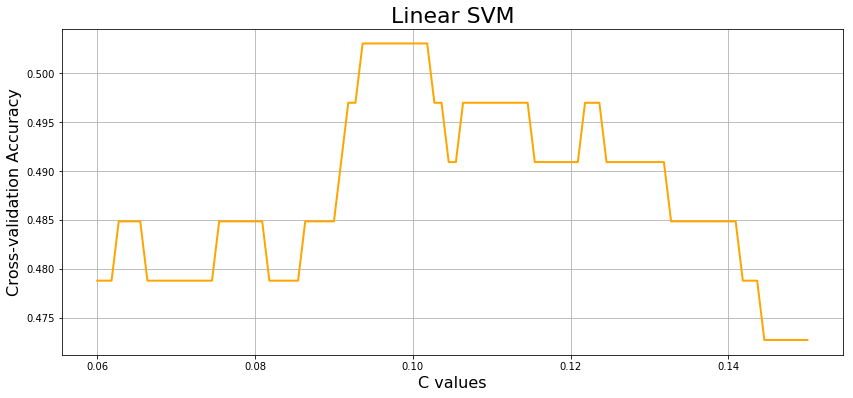

In [20]:
plt.figure(figsize=(14,6))  
plt.plot(C,acc_lis, linewidth = 2, c = 'orange')
plt.xlabel('C values', fontsize=16)                                                                   # X-Axis
plt.ylabel('Cross-validation Accuracy', fontsize=16)                                                  # Y-Axis
plt.title('Linear SVM', fontsize=22)                                                                  # Title of the plot
plt.grid() 

### Calculating the Linear SVM accuracy on full data

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
Y_pred = svclassifier.predict(X_test)
flag = accuracy_score(Y_test, Y_pred)

In [22]:
lsvm_fl = round(flag,4)*100
print("Accuracy:",lsvm_fl,"%")

Accuracy: 33.33 %


### Confusion Matrix and Classification Report for Linear SVM

In [23]:
print(confusion_matrix(Y_test,Y_pred))

[[ 4 12]
 [16 10]]


In [24]:
print(classification_report(Y_test,Y_pred)) 

              precision    recall  f1-score   support

        -1.0       0.20      0.25      0.22        16
         1.0       0.45      0.38      0.42        26

   micro avg       0.33      0.33      0.33        42
   macro avg       0.33      0.32      0.32        42
weighted avg       0.36      0.33      0.34        42



### 2.3 Kernel SVMs

In [25]:
acc_sc = 0 
G = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]            # list of different Gamma values to find the value with max accuracy
acc_lis = np.zeros(len(G))

for i in range(4,-1,-1):
    X_train_1,Y_train_1,X_test_1,Y_test_1 = [],[],[],[]
    X_test_1 = X_fold[i]
    Y_test_1 = Y_fold[i]
    for j in range(0,5):
        if(j!=i):
            X_train_1+=X_fold[j]
            Y_train_1+=Y_fold[j]
    for k in range(0,len(G)):
        svclassifier = SVC(gamma = G[k], kernel='rbf')     # RBF Kernal with different Gamma Values
        svclassifier.fit(X_train_1, Y_train_1)

        Y_pred = svclassifier.predict(X_test_1)

        flag = accuracy_score(Y_test_1, Y_pred)
        acc_lis[k]=acc_lis[k]+flag

acc_lis = acc_lis/5
g_val = G[acc_lis.tolist().index(max(acc_lis))]
acc_sc = max(acc_lis)

In [26]:
dict_acc = dict(zip(G, acc_lis))
print("C values and their accuracies:")
dict_acc

C values and their accuracies:


{0.001: 0.4727272727272728,
 0.01: 0.509090909090909,
 0.1: 0.43636363636363634,
 1: 0.47272727272727266,
 10: 0.47272727272727266,
 100: 0.47272727272727266,
 1000: 0.47272727272727266,
 10000: 0.47272727272727266}

In [27]:
print("The Gamma value where we got maximum accuracy:")
print("Value of Gamma:",g_val)
print("Accuracy:",round(acc_sc,5)*100,"%")

The Gamma value where we got maximum accuracy:
Value of Gamma: 0.01
Accuracy: 50.909000000000006 %


#### Earlier we used Gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000] and we got maximum accuracy at Gamma = 0.1 as 48.5% approx so now we try to zoom in to get the precise value for Gamma. 

In [28]:
acc_sc = 0
low = 60/(100/g_val)
hi = 150/(100/g_val)
G = np.linspace(low,hi,100)              # Here we take 100 values around 0.1 as Gamma values and repeating the same steps
G.sort()
acc_lis = np.zeros(G.size)

for i in range(4,-1,-1):
    X_train_1,Y_train_1,X_test_1,Y_test_1 = [],[],[],[]
    X_test_1 = X_fold[i]
    Y_test_1 = Y_fold[i]
    for j in range(0,5):
        if(j!=i):
            X_train_1+=X_fold[j]
            Y_train_1+=Y_fold[j]
    for k in range(0,G.size):
        svclassifier = SVC(gamma = G[k], kernel='rbf')
        svclassifier.fit(X_train_1, Y_train_1)

        Y_pred = svclassifier.predict(X_test_1)

        flag = accuracy_score(Y_test_1, Y_pred)
        acc_lis[k]=acc_lis[k]+flag

acc_lis = acc_lis/5
g_val = G[acc_lis.tolist().index(max(acc_lis))]
acc_sc = max(acc_lis)

In [29]:
print("Value of Gamma:",g_val)
ksvm_acc = round(acc_sc,4)*100
print("Accuracy:",ksvm_acc,"%")

Value of Gamma: 0.014636363636363637
Accuracy: 52.73 %


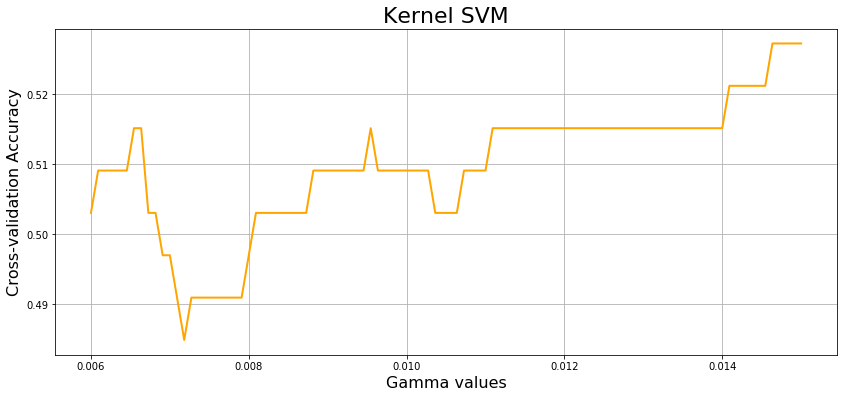

In [30]:
plt.figure(figsize=(14,6))  
plt.plot(G,acc_lis, linewidth = 2, c = 'orange')
plt.xlabel('Gamma values', fontsize=16)                                                               # X-Axis
plt.ylabel('Cross-validation Accuracy', fontsize=16)                                                  # Y-Axis
plt.title('Kernel SVM', fontsize=22)                                                                  # Title of the plot
plt.grid() 

### Calculating the Kernal SVM accuracy on full data

In [31]:
from sklearn.metrics import classification_report, confusion_matrix  
Y_pred = svclassifier.predict(X_test)
flag = accuracy_score(Y_test, Y_pred)

In [32]:
ksvm_fl = flag*100
print("Accuracy:",ksvm_fl,"%")

Accuracy: 47.61904761904761 %


### Confusion Matrix and Classification Report for Kernal SVM

In [33]:
print(confusion_matrix(Y_test, Y_pred))

[[ 5 11]
 [11 15]]


In [34]:
print(classification_report(Y_test, Y_pred)) 

              precision    recall  f1-score   support

        -1.0       0.31      0.31      0.31        16
         1.0       0.58      0.58      0.58        26

   micro avg       0.48      0.48      0.48        42
   macro avg       0.44      0.44      0.44        42
weighted avg       0.48      0.48      0.48        42



### Final Table of Results

In [35]:
import pandas as pd

In [36]:
data = {'Classification': ['Logistic Regression', 'Linear SVM (Cross_validation)','Linear SVM (Test Data)', 'Kernel SVM (Cross_validation)','Kernal SVM (Test Data)'],
        'Accuracy': [lr_acc, lsvm_acc, lsvm_fl, ksvm_acc,ksvm_fl]}

df = pd.DataFrame(data)

In [37]:
df

,Classification,Accuracy
0,Logistic Regression,80.950000
1,Linear SVM (Cross_validation),50.300000
2,Linear SVM (Test Data),33.330000
3,Kernel SVM (Cross_validation),52.730000
4,Kernal SVM (Test Data),47.619048
